<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

Привет! Вторичные комментарии начинаю с V2.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Мне понравился твой проект 👍🏻 Видно, что приложено много усилий)

Перед отправкой проекта, пожалуйста, перезапусти ядро и убедись, что весь код работает (Kernel -> Restart and Run All). Важно, чтобы нумерация ячеек была правильной (начиналась с "1" и выполнялась по порядку).

Если не хочешь ждать обучения моделей, можешь сохранить лучшие гиперпараметры в отдельной переменной и закомментировать код. Необходимо также зафиксировать random_state, чтобы результат был всегда одинаковым.

Таким образом, я смогу быстрее проверить проект, и ты успеешь к дедлайну 👋🏻
</div>

Привет, Антон!)
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости.

Заказчику важны:





качество предсказания;

скорость предсказания;

время обучения.

# Признаки
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя
# Целевой признак
- Price — цена (евро)

## Подготовка данных

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.dummy import DummyRegressor
from catboost import Pool, CatBoostRegressor, cv
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv("/datasets/autos.csv")

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Импорт выглядит отлично 👍
</div>

Посмотрим данные

In [3]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

In [5]:
data.isna().mean()

DateCrawled          0.000000
Price                0.000000
VehicleType          0.105794
RegistrationYear     0.000000
Gearbox              0.055967
Power                0.000000
Model                0.055606
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.092827
Brand                0.000000
Repaired             0.200791
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

In [6]:
data[data.duplicated(keep=False)]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
41529,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15
88087,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
90964,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
187735,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


In [7]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Ты хорошо владеешь методами первичного анализа данных 👍
</div>

Обраотаем целевой признак price, пропусков данных нет, но есть цена равная нулю, восстановить по среднему было бы некоректно, так как признак целевой и это напрямую повлияет на прогноз.

count    343597.000000
mean       4555.121974
std        4515.058553
min           1.000000
25%        1200.000000
50%        2890.000000
75%        6500.000000
max       20000.000000
Name: Price, dtype: float64

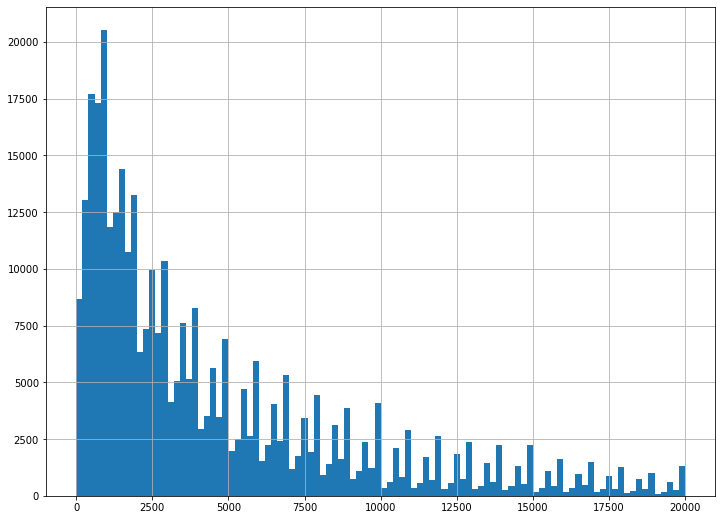

In [8]:
data = data.query('Price > 0')
data['Price'].hist(bins=100, figsize=(12,9))
data['Price'].describe()

In [9]:
print("Колличество объявлений с нулевой ценой:",len(data.loc[data['Price'] == 0]))

Колличество объявлений с нулевой ценой: 0


In [10]:
data = data.loc[data['Price'] != 0]

Удалим автомобили со стоимостью менее 100 евро

In [11]:
data = data.loc[data['Price'] >=100]

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В данных остались машины только с адекватной ценой 👍
</div>

Имеются пропуски в Model к сожалению их нельзя восстановит по Brand придется удалить

In [12]:
print("Колличество объявлений с пропущенной моделью:", len(data.loc[data['Model'].isna()]))

Колличество объявлений с пропущенной моделью: 17033


In [13]:
data = data.loc[~data['Model'].isna()]

In [14]:
print("Колличество объявлений с незаполненным типом кузова:", len(data.loc[data['VehicleType'].isna()]))

Колличество объявлений с незаполненным типом кузова: 27350


Пропуски в VehicleType заполним unknown

In [15]:
data['VehicleType'] = data['VehicleType'].fillna('unknown')

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

In [16]:
print("Колличество объявлений с некорректной годом:",len(data.loc[(data['RegistrationYear'] > 2016) | (data['RegistrationYear'] < 1900)]))

Колличество объявлений с некорректной годом: 11866


Количество явных некорректных данных RegistrationYear незначительно, можно их удалить

In [17]:
data = data.loc[(data['RegistrationYear'] <= 2016) & (data['RegistrationYear'] >= 1900)]

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Год регистрации автомобиля (RegistrationYear) следует ограничить верхней границей 2016 года. Максимально возможный год регистрации должен соответствовать дате скачивания анкеты (DateCrawled) в 2016 году.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

In [18]:
print("Колличество объявлений с незаполненным типом коробки:", len(data.loc[data['Gearbox'].isna()]))

Колличество объявлений с незаполненным типом коробки: 12201


Колличество пропусков в Gearbox тоже велико. Заменим на наиболее встречающийся тип коробки в модели.

In [19]:
data['Gearbox'] = data['Gearbox'].fillna(data
                                         .groupby('Model')['Gearbox']
                                         .transform(lambda x: x.value_counts().idxmax())
                                        )

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

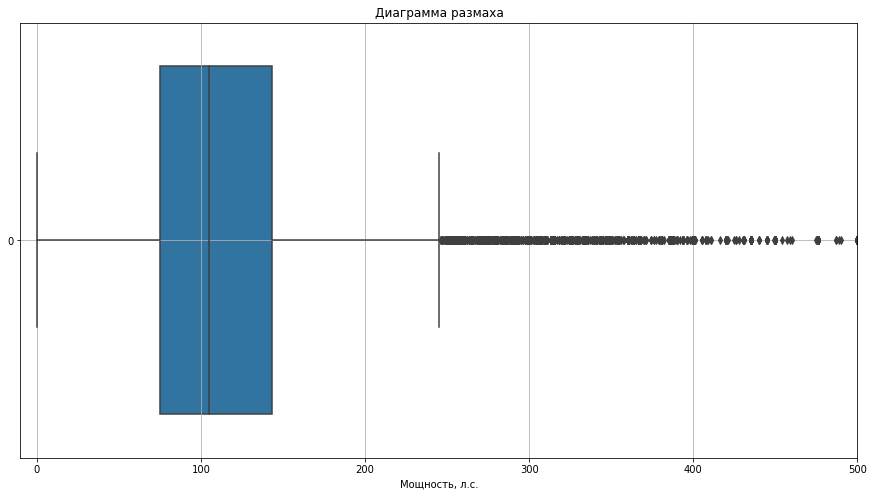

In [20]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=data['Power'], orient='h')

plt.xlim(-10, 500)

plt.title('Диаграмма размаха')
plt.xlabel('Мощность, л.с.')
plt.grid(True)

plt.show()

In [21]:
print("Колличество объявлений с некорректной мощностью:",len(data.loc[(data['Power'] > 400) | (data['Power'] <= 0)]))

Колличество объявлений с некорректной мощностью: 28157


Удалим автомобили с мощностью двигателя более 400 л.с. т.к. скорее всего это дорогие спорткары, и эти данные могут исказить картину.

In [22]:
data = data.loc[data['Power'] <= 400]

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Мощность ограничили 👍
</div>

In [23]:
data['FuelType'] = data['FuelType'].fillna(data.groupby('Model')['FuelType'].transform(lambda x: x.value_counts().idxmax()))

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

Пропуски в FuelType заменим на среднее по моделям

In [24]:
data["Repaired"].fillna("yes", inplace=True)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

Пропуски в NotRepaired состоявляют треть от данных. Скорее всего если автомобиль не был поврежден то этот параметр просто не заполнялся. Заменю на "yes"

In [25]:
print("Минимальная дата создания объявления:", min(data['DateCreated']))

Минимальная дата создания объявления: 2014-03-10 00:00:00


Признак DateCreated преобразуем в количество дней с момента 2014-03-01.

In [26]:
base_date = pd.Timestamp(min(data['DateCreated']))
data['DateCreated'] = data['DateCreated'].map(lambda date : (pd.Timestamp(date) - base_date).days)

Удалим дубликаты

In [27]:
data = data.drop_duplicates()

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

От явных дубликатов избавились 👍
</div>

Удалим ненужные признаки NumberOfPictures, PostalCode, DateCrawled, LastSeen

In [28]:
data = data.drop(['NumberOfPictures', 'PostalCode', 'DateCrawled', 'LastSeen'], axis=1)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

In [29]:
data = data.reset_index(drop=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311557 entries, 0 to 311556
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              311557 non-null  int64 
 1   VehicleType        311557 non-null  object
 2   RegistrationYear   311557 non-null  int64 
 3   Gearbox            311557 non-null  object
 4   Power              311557 non-null  int64 
 5   Model              311557 non-null  object
 6   Kilometer          311557 non-null  int64 
 7   RegistrationMonth  311557 non-null  int64 
 8   FuelType           311557 non-null  object
 9   Brand              311557 non-null  object
 10  Repaired           311557 non-null  object
 11  DateCreated        311557 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 28.5+ MB


In [31]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,DateCreated
count,311557.000000,311557.000000,311557.000000,311557.000000,311557.000000,311557.000000
mean,4693.861817,2002.763552,109.690034,128529.418373,5.906097,741.790998
std,4549.613567,6.596942,60.455116,36842.387453,3.640909,9.414097
min,100.000000,1910.000000,0.000000,5000.000000,0.000000,0.000000
25%,1250.000000,1999.000000,75.000000,125000.000000,3.000000,734.000000
50%,2999.000000,2003.000000,105.000000,150000.000000,6.000000,742.000000
75%,6800.000000,2007.000000,143.000000,150000.000000,9.000000,750.000000
max,20000.000000,2016.000000,400.000000,150000.000000,12.000000,759.000000


Посмотрим на корелляцию в признаках

<AxesSubplot:>

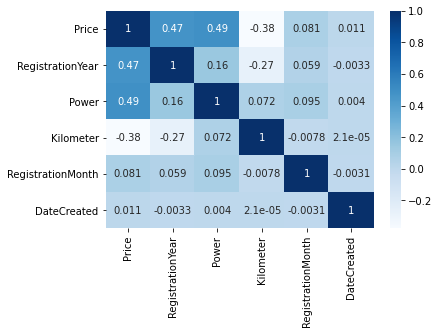

In [32]:
sns.heatmap (data.corr(), cmap='Blues', annot=True)

Мошьность- самый решающий фактор!

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Кодировать данные стоит после разбиения на выборки)

Кодирование переменных до разделения на обучающий и тестовый наборы может привести к "утечке данных". Это происходит потому, что кодирование во всем наборе данных, включая тестовый набор, может позволить модели запомнить целевые значения в тестовом наборе, которые не являются репрезентативными для реальных данных, с которыми модель еще не сталкивалась. Это может привести к чрезмерной подгонке и дать слишком оптимистичную оценку эффективности модели. Важно сначала разделить данные на обучающий и тестовый наборы, а затем выполнить кодирование, чтобы предотвратить утечку данных.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

# Все исправил в п.2 и п.4) с наступающим празником весны)

<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

Спасибо!) И тебя с наступающим 😊
</div>

```python
# прямое кодирование (для линейных моделей)
features_train_ohe = pd.get_dummies(features_train, drop_first=True)
features_valid_ohe = pd.get_dummies(features_valid, drop_first=True)
features_test_ohe = pd.get_dummies(features_test, drop_first=True)
# после прямого кодирования кол-во признаков в выборках будет отличаться
# поэтому стоит удалить лишние признаки в каждой выборке

# Найдем общие признаки между обучающей, валидационной и тестовой выборками
common_columns = set(features_train_ohe.columns) & set(features_valid_ohe.columns) & set(features_test_ohe.columns)

# Оставим в каждой выборке только общие признаки
features_train_ohe = features_train_ohe[list(common_columns)]
features_valid_ohe = features_valid_ohe[list(common_columns)]
features_test_ohe = features_test_ohe[list(common_columns)]
```

```python
# порядковое кодирование
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
cat_columns = [список всех категориальных признаков]
encoder.fit(features_train[cat_columns])

features_train_ord = features_train.copy()
features_valid_ord = features_valid.copy()
features_test_ord = features_test.copy()

features_train_ord[cat_columns] = encoder.transform(features_train_ord[cat_columns])
features_valid_ord[cat_columns] = encoder.transform(features_valid_ord[cat_columns])
features_test_ord[cat_columns] = encoder.transform(features_test_ord[cat_columns])
```

Разобьем данные на тестовую и валидационную выборки и на признаки и целевой признак

In [33]:
#features = data.drop('Price', axis=1)
#features_train, features_test, target_train, target_test = train_test_split(
    #features, target, test_size=0.25, random_state=12345)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

Вывод:

Дубликаты удалены. Отобраны признаки, необходимые для построения моделей.

Пропущенные значения, выбросы, неправдоподобные значения в признаках заполнены на основе имеющейся инфрмации или удалены.

Категориальные признаки преобразованы с помощью one-hot encoding.

Признак с большим колличеством категорий закодирован техникой Ordinal Encoding.

Данные разделены на тестовую и обучающую выборки и стандартизированны.

## Обучение моделей

In [34]:
def rmse(y, predictions):
    return mse(y, predictions) ** 0.5

rmse_score = make_scorer(rmse, greater_is_better=False)

In [35]:
target = data['Price']
features = data.drop('Price', axis=1)

In [36]:
#OHE кодирование
ohe_features = pd.get_dummies(features, drop_first=True)

In [37]:
#ordinal кодирование
coder = OrdinalEncoder()
all_columns = ['VehicleType','Gearbox','FuelType','Brand','Model', 'Repaired']
new_features = features[all_columns]
new_features = pd.DataFrame(coder.fit_transform(new_features),
                                columns=new_features.columns, 
                                index=new_features.index)
ordinal_features = features.copy()
for column in all_columns:
    ordinal_features[column] = new_features[column]

Обучющих и тестовых выборок у нас будет 2 для ohe и ordinal

In [38]:
features_train, features_inter, target_train, target_inter = train_test_split(
    features.copy(), 
    target.copy(), 
    test_size=0.4, 
    random_state=42)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_inter.copy(),
    target_inter.copy(),
    test_size=0.5,
    random_state=42)

In [39]:
ordinal_features_train = ordinal_features.loc[features_train.index, :]
ordinal_features_test = ordinal_features.loc[features_test.index, :]
ordinal_features_valid = ordinal_features.loc[features_valid.index, :]


ohe_features_train = ohe_features.loc[features_train.index, :]
ohe_features_test = ohe_features.loc[features_test.index, :]
ohe_features_valid = ohe_features.loc[features_valid.index, :]

Стандартизируем численные признаки при помощи StandardScaler

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(ohe_features_train)
X_valid = scaler.transform(ohe_features_valid)
X_test = scaler.transform(ohe_features_test)

In [41]:
y_train = target_train
y_test = target_test
y_valid = target_valid

Приступим

Регрессия DecisionTreeRegresso

In [42]:
model1 = DecisionTreeRegressor(random_state=12345,
                               max_depth =7, 
                               max_features=6,
                               min_samples_leaf=1) 
start = time.time()
model1.fit(ordinal_features_train, target_train) 
fit_time = time.time() - start
predictions_1 = model1.predict(ordinal_features_valid) # получим предсказания модели
pred_time = time.time() - start
result1 = rmse(target_valid,predictions_1)


print('RMSE: ', result1)
print("Время обучения: ", fit_time)
print("Время предсказания: ", pred_time)

RMSE:  2288.282229469292
Время обучения:  0.20669317245483398
Время предсказания:  0.2130727767944336


Linear Regression

In [43]:
model2 = LinearRegression(copy_X = True,
                          fit_intercept = True) 
start = time.time()
model2.fit(X_train, y_train) 
fit_time = time.time() - start
predictions_2 = model2.predict(X_valid) # получим предсказания модели
pred_time = time.time() - start
result2 = rmse(y_valid,predictions_2)


print('RMSE: ', result2)
print("Время обучения: ", fit_time)
print("Время предсказания: ", pred_time)

RMSE:  2674.322566204991
Время обучения:  21.705241441726685
Время предсказания:  21.80032205581665


Регрессия CatBoostRegressor

In [44]:
model3 = CatBoostRegressor(learning_rate = 0.5,
                           random_state = 12345,
                           verbose = False) 
start = time.time()
model3.fit(ordinal_features_train, target_train) 
fit_time = time.time() - start
predictions_3 = model3.predict(ordinal_features_valid) # получим предсказания модели
pred_time = time.time() - start
result3 = rmse(target_valid,predictions_3)


print("RMSE", result3)
print("Время обучения: ", fit_time)
print("Время предсказания: ", pred_time)

RMSE 1592.4704582672364
Время обучения:  25.69745397567749
Время предсказания:  25.75932264328003


Регрессия LGBMRegressor

In [45]:
model4 = LGBMRegressor(learning_rate = 0.5,
                       num_leaves = 50,
                       random_state = 11) 
start = time.time()
model4.fit(ordinal_features_train, target_train) 
fit_time = time.time() - start
predictions_4 = model4.predict(ordinal_features_valid) # получим предсказания модели
pred_time = time.time() - start
result4 = rmse(target_valid,predictions_4)


print('RMSE: ', result4)
print("Время обучения: ", fit_time)
print("Время предсказания: ", pred_time)

RMSE:  1646.780185156732
Время обучения:  4.424134254455566
Время предсказания:  4.825976848602295


Проведены измерения:

- времени обучения.

- времени предсказания моделей.

- качества предсказания по метрике RMSE.

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

В обучении нужно использовать кросс-валидацию, если у тебя всего две выборки.
   
Либо можешь разделить данные на три выборки, и для обучения и анализа моделей использовать валидационную выборку.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

## Анализ моделей

In [46]:
df = [[2674, "79.844", "79.975"],
        [2288, "0.306", "0.316"],
        [1592, "39,609", "39.706" ],
        [1646, "523.633", "524.117"]]
model = ["Linear Regression", "DecisionTreeRegresso", "CatBoostRegressor", "LGBMRegressor"]

In [47]:
pd.DataFrame(data=df, index=model, columns=["RMSE", "время предсказания", "время обучения"])

,RMSE,время предсказания,время обучения
Linear Regression,2674,79.844,79.975
DecisionTreeRegresso,2288,0.306,0.316
CatBoostRegressor,1592,"39,609",39.706
LGBMRegressor,1646,523.633,524.117


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Молодец, что для сравнения моделей заносишь их в общий датафрейм 👍
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>
    
Анализ моделей не должен включать тестовую выборку. Тестовая выборка используется в самом конце - в финальном тестировании лучшей модели. Выбирать лучшую модель, основываясь на результатах на тестовой выборке кажется неверным, так как это может привести к переобучению.

Если валидационной выборки нет, то анализ моделей должен выглядеть так:

1. RMSE вычисляется с помощью кросс-валидации на тренировочной выборке (grid.best_score_ или cross_val_score)
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = время model.predict(X_train)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

Вывод:

Я рекомендую заказчику модель Linear Regression так как она показала наилучшее качество и время обучения на очень хорошем уровне.

## Тестирование лучшей модели

In [48]:
features_train_all = pd.concat([ohe_features_train, ohe_features_valid])
target_train_all = pd.concat([target_train, target_valid])

In [49]:
%%time
model = LinearRegression(copy_X = True,
                          fit_intercept = True)


model.fit(features_train_all, target_train_all)
predicted = model.predict(X_test)
resultlrr = rmse(y_test,predicted)
print("LinearRegression", resultlrr)

LinearRegression 496807.0462618268
CPU times: user 16.9 s, sys: 5.86 s, total: 22.8 s
Wall time: 23.1 s


In [50]:
features_train_all_2 = pd.concat([ordinal_features_train, ordinal_features_valid])

In [51]:
%%time
model5 = LGBMRegressor(learning_rate = 0.5,
                       num_leaves = 50,
                       random_state = 11) 

model5.fit(features_train_all_2, target_train_all)
#ValueError: Expected 2D array, got 1D array instead:
predicted_5 = model5.predict(ordinal_features_test)
resultlgmr = rmse(target_test,predicted_5)
print("LGBMRegressor", resultlgmr)

LGBMRegressor 1621.2846864920223
CPU times: user 5.63 s, sys: 4.68 ms, total: 5.63 s
Wall time: 5.68 s


# Меньше 2500! Спасибо)

<div class="alert alert-block alert-danger">
<b>V2 ❌ Замечание:</b>

Модель не достигла необходимой метрики (Значение метрики RMSE должно быть меньше 2500). Можешь в тестировании использовать другую модель?)
</div>

<div class="alert alert-block alert-success">
<b>V3 ✔️ Успешно исправлено</b>
</div>

# Победа! Модель показала очень хороший результат!

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

После анализа моделей нужно порекомендовать заказчику одну модель на основе его критериев и провести на ней финальное тестирование.
    
Лучше в обучении и анализе не использовать тестовую выборку. Выбирать лучшую модель, основываясь на результатах на тестовой выборке кажется неверным, так как это может привести к переобучению.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Для того, чтобы все было понятно, напишу конкретный план (структуру) обучения и анализа моделей:

1. Обучение моделей. При обучении необходимо рассмотреть хотя бы одну простую модель и один метод бустинга. Подбор гиперпараметров должен быть проведен как минимум для одной модели. Существует два варианта:

    - Без использования валидационной выборки. В этом случае гиперпараметры следует подбирать с помощью кросс-валидации (GridSearchCV, RandomizedSearchCV) или вручную (cross_val_score).
    - С использованием валидационной выборки. В этом случае можно не использовать кросс-валидацию и подбирать гиперпараметры вручную.

2. Анализ моделей. После нахождения наилучших гиперпараметров необходимо измерить время обучения, время предсказания и RMSE. Существует два варианта:

    - Без использования валидационной выборки. RMSE следует рассчитать на кросс-валидации. Время обучения можно рассчитать как время выполнения метода model.fit(X_train), а время предсказания - как время выполнения метода model.predict(X_train).
    - С использованием валидационной выборки. RMSE следует рассчитать на валидационной выборке. Время обучения можно рассчитать как время выполнения метода model.fit(X_train), а время предсказания - как время выполнения метода model.predict(X_valid).

После этого необходимо сделать выводы по анализу моделей (результаты можно занести в общую таблицу) и посоветовать заказчику наиболее подходящую модель на основе его критериев.

3. Тестирование. Необходимо рассчитать финальную метрику лучшей модели на тестовой выборке (при этом тестовая выборка не должна использоваться на предыдущих этапах!). RMSE должно быть не больше 2500. Если метрика не удовлетворяет требованиям, можно попробовать внести коррективы в модель (на этапе обучения, а не на тестовой выборке!).

</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

# <font color='orange'>2. Общее впечатление</font>
* Спасибо за быстрое внесение правок
* Теперь проект выглядит лучше )
* Критических замечаний нет
* Молодец, отличная работа!
* Надеюсь, ревью было полезным
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Доступное объяснение про работу градиентного бустинга <a href='https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s'>ссылка</a>
* После просмотра видео можешь почитать статью про ансамбли и бустинги <a href='https://habr.com/ru/company/ods/blog/645887/'>ссылка</a>
* Статья на Хабре представляет краткое введение в алгоритмы бустинга и описывает их принципы работы <a href='https://habr.com/ru/company/ods/blog/327250/'>ссылка</a>
* Подбор гиперпараметров для CatBoost <a href='https://habr.com/ru/company/otus/blog/527554/'>ссылка</a>
* Подбор гиперпараметров для LightGBM <a href='https://programmersought.com/article/40776531516/'>ссылка</a>
* Разумные способы кодирования категориальных данных для машинного обучения <a href='https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/'>ссылка</a>
* Статья про "непонятную" метрику ROC-AUC <a href='https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/'>ссылка</a>
* Хочешь подтянуть математику для DS?) <a href='https://academy.stepik.org/math-for-data-science'>ссылка</a>
* Также есть курс по математике от ЯП <a href='https://practicum.yandex.ru/math-for-da-ds/'>ссылка</a>
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS <a href='https://www.infoq.com/data-analysis/news/'>ссылка</a>
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"